In [ ]:
for i in range(21):
    raw = pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\{}\{}.csv'.format(2000+i,2000+i))
    raw['YEAR'] = 2000+i
    raw = raw.drop([raw.columns[7]], axis = 1)
    if i == 0 :
        data = raw
    else:
        data = pd.concat([data,raw]) 
data.to_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [2]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '103402',
'header': '2618 Historical Data',
'st_date': '01/01/2011',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
result = requests.post(url, headers = head, data = payload)
result.status_code
temp = BeautifulSoup(result.text)
stockdata = pd.read_html(str(temp.find('table')))[0]
for i in range(len(stockdata['Date'])):
    if stockdata['Date'][i].split()[0] == 'Jan':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 01. 25.'
    elif stockdata['Date'][i].split()[0] == 'Feb':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 02. 25.'
    elif stockdata['Date'][i].split()[0] == 'Mar':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 03. 25.'
    elif stockdata['Date'][i].split()[0] == 'Apr':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 04. 25.'
    elif stockdata['Date'][i].split()[0] == 'May':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 05. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jun':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 06. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jul':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 07. 25.'
    elif stockdata['Date'][i].split()[0] == 'Aug':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 08. 25.'
    elif stockdata['Date'][i].split()[0] == 'Sep':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 09. 25.'
    elif stockdata['Date'][i].split()[0] == 'Oct':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 10. 25.'
    elif stockdata['Date'][i].split()[0] == 'Nov':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 11. 25.'
    elif stockdata['Date'][i].split()[0] == 'Dec':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 12. 25.'
stockdata.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\stock_Eva.xlsx')

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data =pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [4]:
company_name = []
for keys in data['UNIQUE_CARRIER_NAME']:
    if keys in company_name :
        continue
    else :
        company_name.append(keys)            

In [5]:
company_name

['Asia Pacific',
 'Varig S. A.',
 'Qantas Airways Ltd.',
 'Cargolux Airlines International S.A',
 'United Air Lines Inc.',
 'ExpressJet Airlines Inc.',
 'Tatonduk Outfitters Limited d/b/a Everts Air Alaska and Everts Air Cargo',
 'Polar Air Cargo Airways',
 'Martinair Holland N.V.',
 'El Al Israel Airlines Ltd.',
 'Northwest Airlines Inc.',
 'Federal Express Corporation',
 'United Parcel Service',
 'Kitty Hawk International',
 'Nippon Cargo Airlines',
 'Japan Air Lines Co. Ltd.',
 'Korean Air Lines Co. Ltd.',
 'Amerijet International',
 'Sterling Cargo',
 'Evergreen International Inc.',
 'Compagnie Natl Air France',
 'Compagnia Aerea Italiana',
 'Lufthansa German Airlines',
 'Arrow Air Inc.',
 'China Airlines Ltd.',
 'Eva Airways Corporation',
 'Reliant Airlines',
 'Pace Airlines',
 'North American Airlines',
 'Sky Trek International Airlines',
 'Falcon Air Express',
 'Capital Cargo International',
 'Express One International Inc.',
 'Astar USA, LLC',
 'Air Transport International',
 '

In [6]:
for lines in company_name:
    if 'Eva' in lines:
        print(lines)

Eva Airways Corporation


TypeError: argument of type 'float' is not iterable

In [7]:
company = 'Eva Airways Corporation'
savename= 'Deltaair'

In [8]:
info = []
threeones = ['1','3','5','7','8','10','12']
thirtys = ['4','6','9','11']
twoeights = ['2']
year = 2000
month = 1
is_company = data['UNIQUE_CARRIER_NAME'] == company
for i in range(21):
    month = 1
    for j in range(12):
        is_month = data['MONTH'] == month
        is_year = data['YEAR'] == year
        classifier = is_company & is_month & is_year
        passengers = data[classifier]['PASSENGERS'].sum()
        freight = data[classifier]['FREIGHT'].sum() + data[classifier]['MAIL'].sum()
        if str(month) in twoeights:
            date = str(year)+'. 0'+str(month)+'. 25.'
        elif str(month) in thirtys:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        elif str(month) in threeones:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        info.append([company, year, month, date, passengers, freight])
        month += 1
    year += 1
temp = pd.DataFrame(info,columns = ['Company','Year','Month','Date','Passenger','Freight'])
table = temp[temp['Passenger']!=0]
globals()['table_{}'.format(savename)]=table

In [9]:
stockdata =pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\stock_Eva.xlsx')

In [10]:
year = 20
while True:
    if year == 0:
        break
    count = 0
    for i in range(len(stockdata['Date'])):
        if stockdata['Date'][i].split()[0].rstrip('.')[2:4].lstrip('0') == str(year):
            count +=1
    if count < 12:
        print('Year of ' + str(year)+' has lower month by '+str(count))
    year = year-1

Year of 20 has lower month by 0
Year of 10 has lower month by 0
Year of 9 has lower month by 0
Year of 8 has lower month by 0
Year of 7 has lower month by 0
Year of 6 has lower month by 0
Year of 5 has lower month by 0
Year of 4 has lower month by 0
Year of 3 has lower month by 0
Year of 2 has lower month by 0
Year of 1 has lower month by 0


In [11]:
floated = []
for i in range(len(stockdata['Change %'])):
    floated.append(float(stockdata['Change %'].values[i].rstrip('%')))
stockdata['Change(float)'] = floated

In [12]:
newdate = []
for i in range(len(table_Deltaair['Date'])):
    date = ''
    for j in range(3):
        if j == 2:
            date += table_Deltaair['Date'].values[i].split()[j].strip().rstrip('.')
        else:
            date += table_Deltaair['Date'].values[i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
table_Deltaair['newdate'] = newdate
temp = table_Deltaair[table_Deltaair['Year']<2020]
table_Deltaair = temp

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
table_Deltaair[table_Deltaair['Year']==2009]

,Company,Year,Month,Date,Passenger,Freight,newdate
108,Eva Airways Corporation,2009,1,2009. 01. 25.,82104.0,27565692.0,2009-01-25
109,Eva Airways Corporation,2009,2,2009. 02. 25.,61955.0,31055860.0,2009-02-25
110,Eva Airways Corporation,2009,3,2009. 03. 25.,75629.0,36930663.0,2009-03-25
111,Eva Airways Corporation,2009,4,2009. 04. 25.,77216.0,34202993.0,2009-04-25
112,Eva Airways Corporation,2009,5,2009. 05. 25.,75550.0,40986965.0,2009-05-25
113,Eva Airways Corporation,2009,6,2009. 06. 25.,75568.0,43225993.0,2009-06-25
114,Eva Airways Corporation,2009,7,2009. 07. 25.,84879.0,41294411.0,2009-07-25
115,Eva Airways Corporation,2009,8,2009. 08. 25.,97827.0,42392301.0,2009-08-25
116,Eva Airways Corporation,2009,9,2009. 09. 25.,75984.0,43130966.0,2009-09-25
117,Eva Airways Corporation,2009,10,2009. 10. 25.,76877.0,49535809.0,2009-10-25


In [14]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,colors = 'color'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=colors)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0,len(x),step = 30),x[np.arange(0,len(x),step = 30)])
    plt.show()

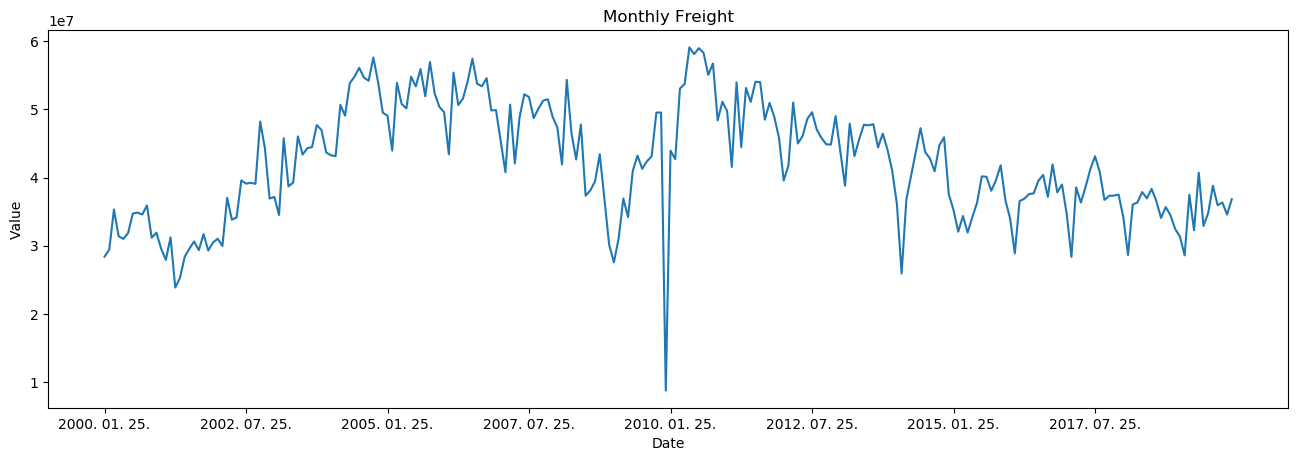

In [15]:
what = 'Freight'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:Blue')

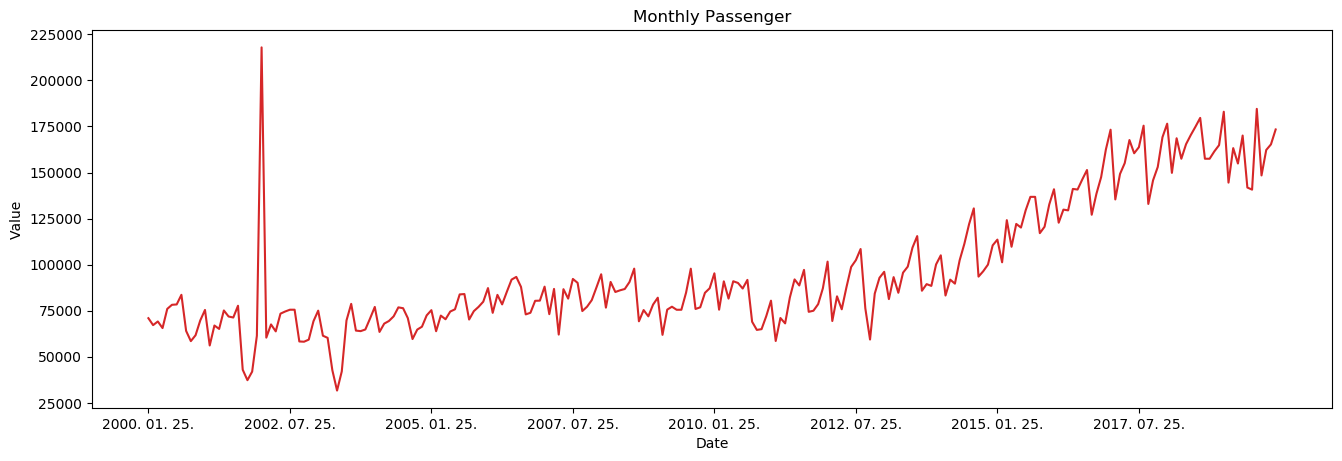

In [16]:
what = 'Passenger'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:red')

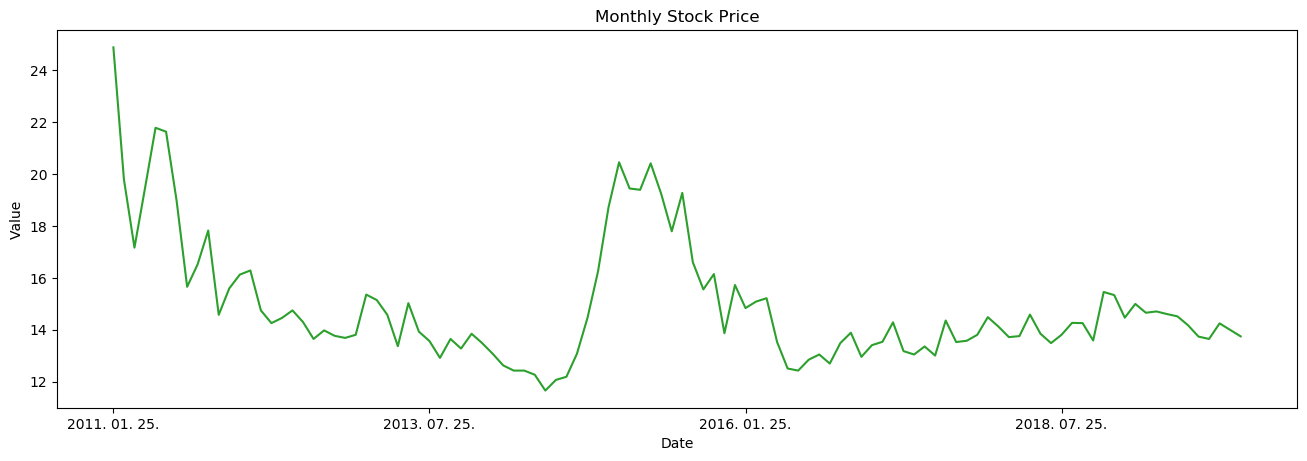

In [17]:
what = 'Price'
#Price or Change(float'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price',colors = 'tab:Green')

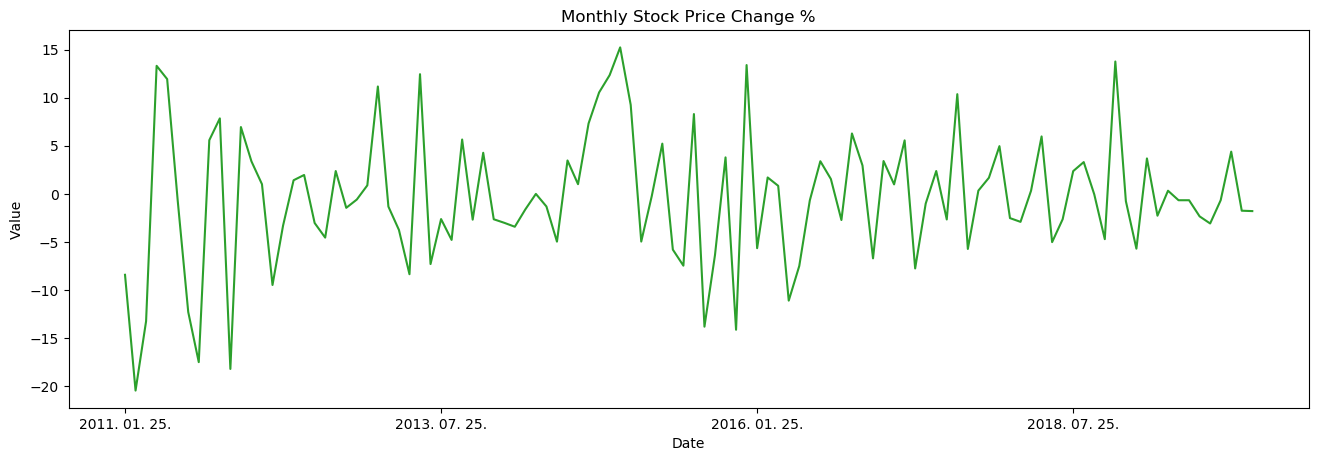

In [18]:
what = 'Change(float)'
#Price or Change(float)'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price Change %',colors = 'tab:Green')

In [19]:
import statsmodels.api as sm
from datetime import datetime
from pylab import rcParams

In [20]:
datetime = []
for i in range(len(table_Deltaair['newdate'])):
    datetime.append(pd.to_datetime(table_Deltaair['newdate'].values[i], format='%Y-%m-%d'))
table_Deltaair['datetime'] = datetime

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


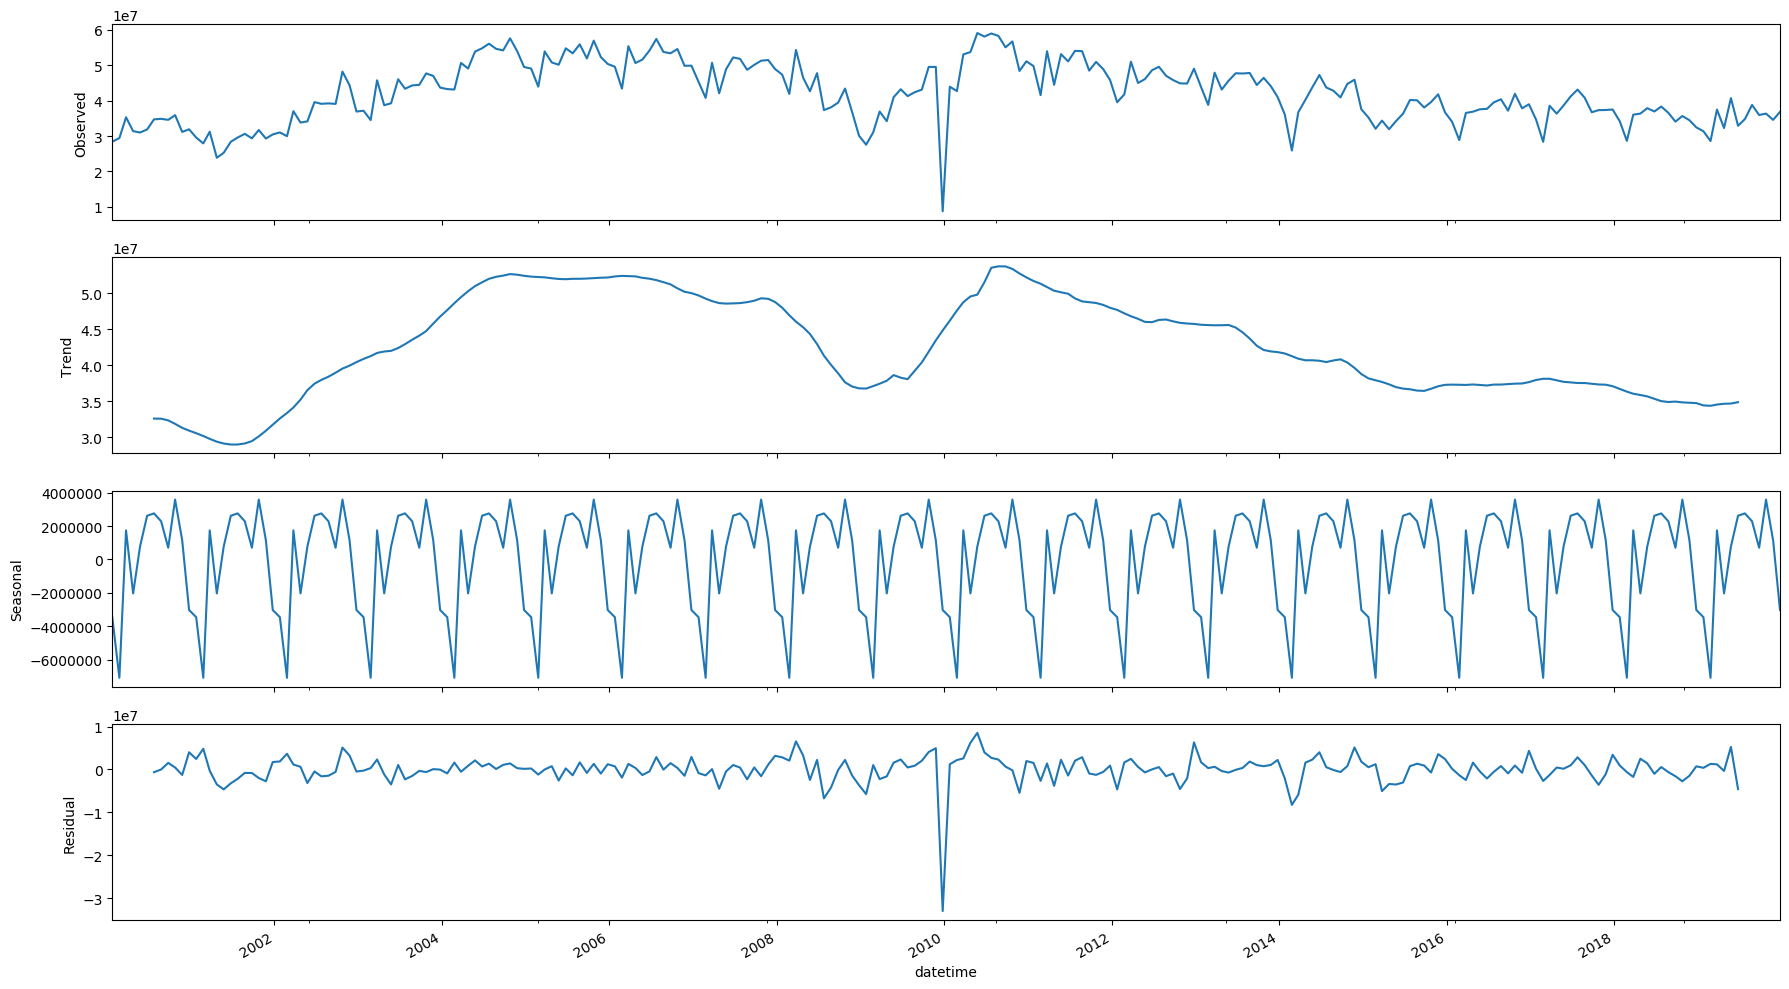

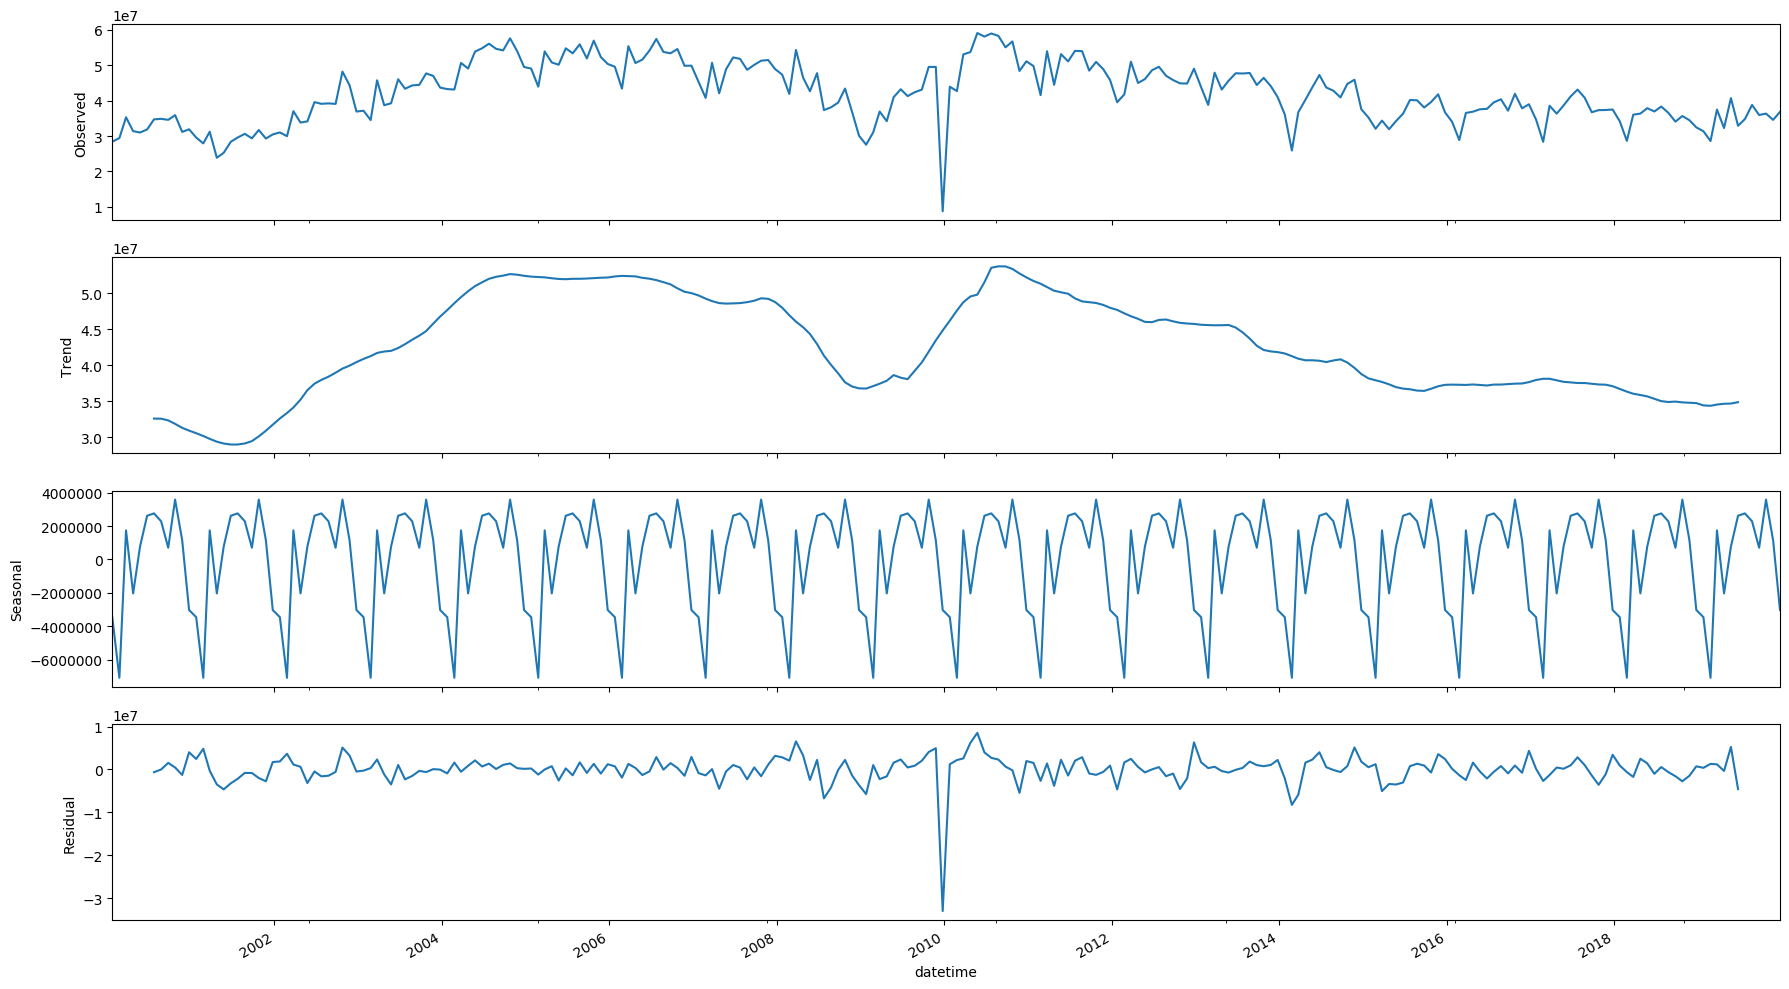

In [21]:
what = 'Freight'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [22]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

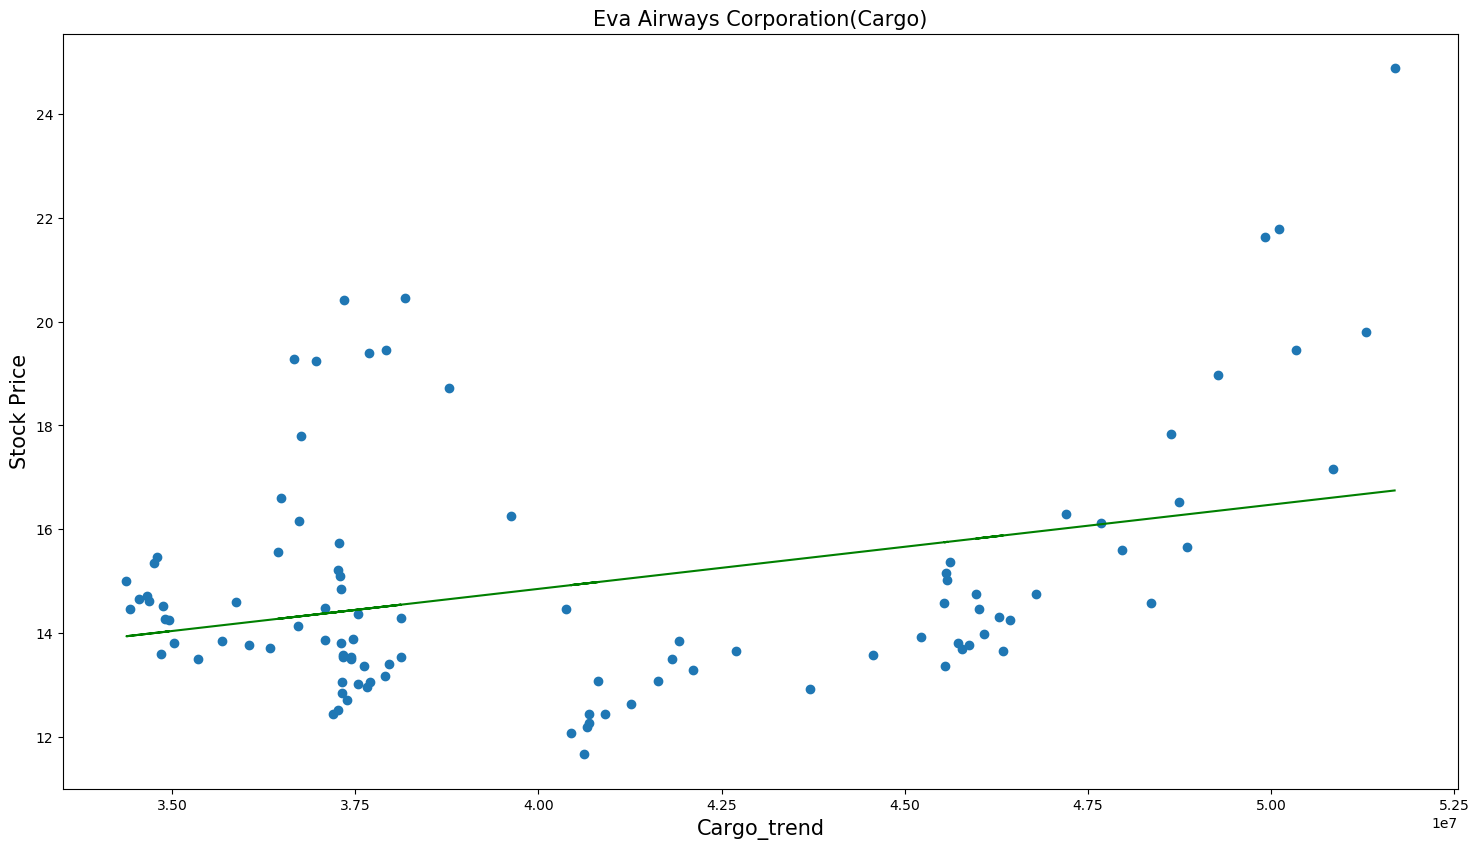

In [23]:
line = LinearRegression()
y_value = chart_info['Price']
x_value = chart_info[what].values
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Cargo)'.format(company), fontsize = 15)
plt.xlabel('Cargo_trend', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [24]:
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     12.54
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           0.000607
Time:                        14:17:44   Log-Likelihood:                -228.56
No. Observations:                 102   AIC:                             461.1
Df Residuals:                     100   BIC:                             466.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3575      1.877      4.451      0.000       4.633      12.082
x1          1.623e-07   4.58e-08      3.541      0.001    7.14e-08    2.53e-07
==============================================================================
Omnibus:                       28.119   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.240
Skew:                           1.348   Prob(JB):                     1.83e-09
Kurtosis:                       4.484   Cond. No.                     3.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

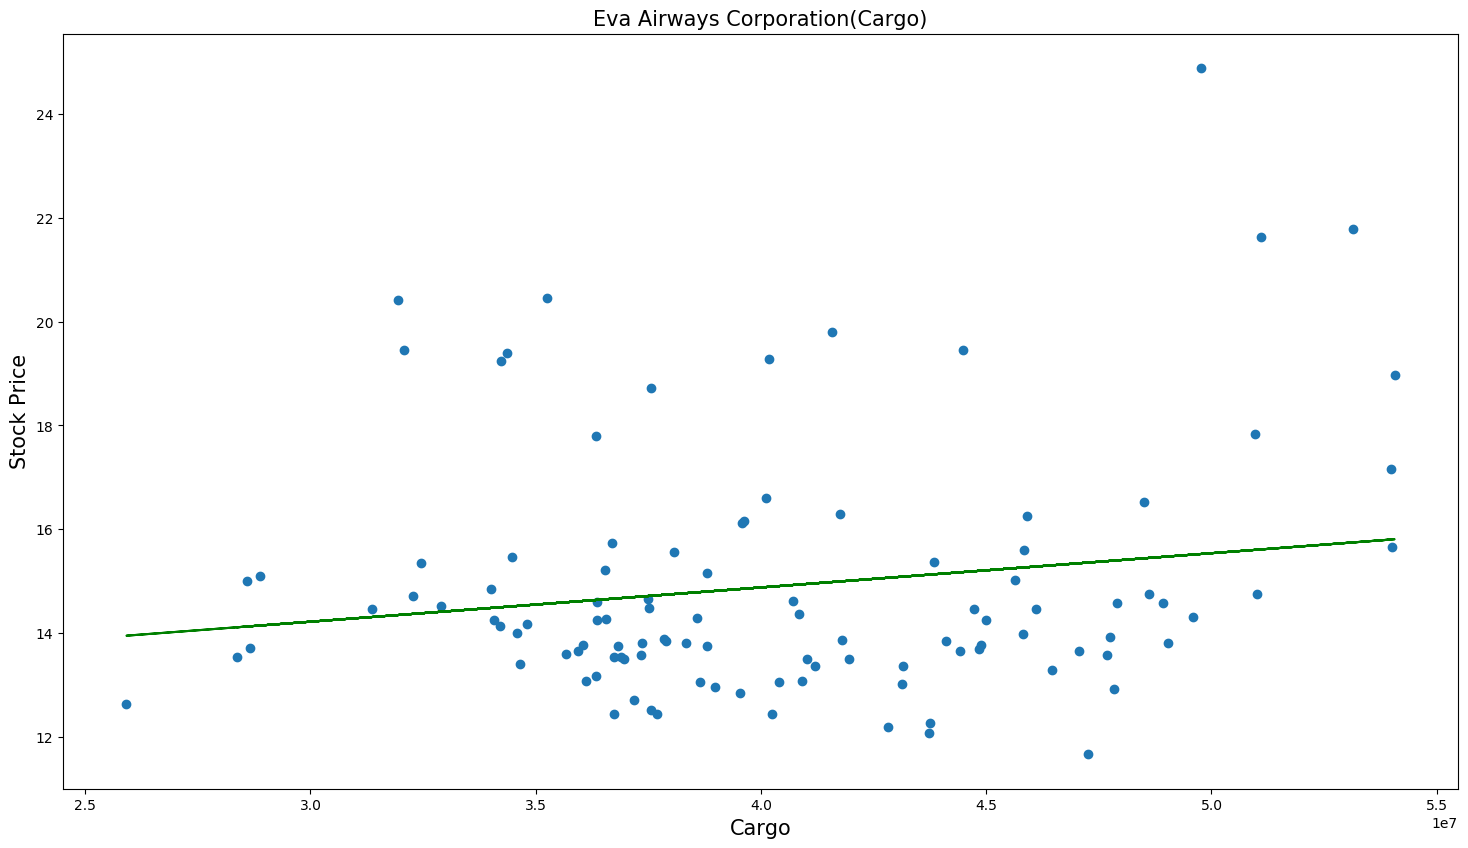

In [26]:
what = 'Freight'
y_value = stockdata['Price'].values[0:189]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:189]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Cargo)'.format(company), fontsize = 15)
plt.xlabel('Cargo', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [27]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.238
Date:                Mon, 21 Dec 2020   Prob (F-statistic):             0.0748
Time:                        14:17:46   Log-Likelihood:                -244.25
No. Observations:                 108   AIC:                             492.5
Df Residuals:                     106   BIC:                             497.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2375      1.497      8.177      0.000       9.270      15.205
x1          6.602e-08   3.67e-08      1.799      0.075   -6.72e-09    1.39e-07
==============================================================================
Omnibus:                       39.778   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.331
Skew:                           1.593   Prob(JB):                     1.19e-16
Kurtosis:                       5.480   Cond. No.                     2.71e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

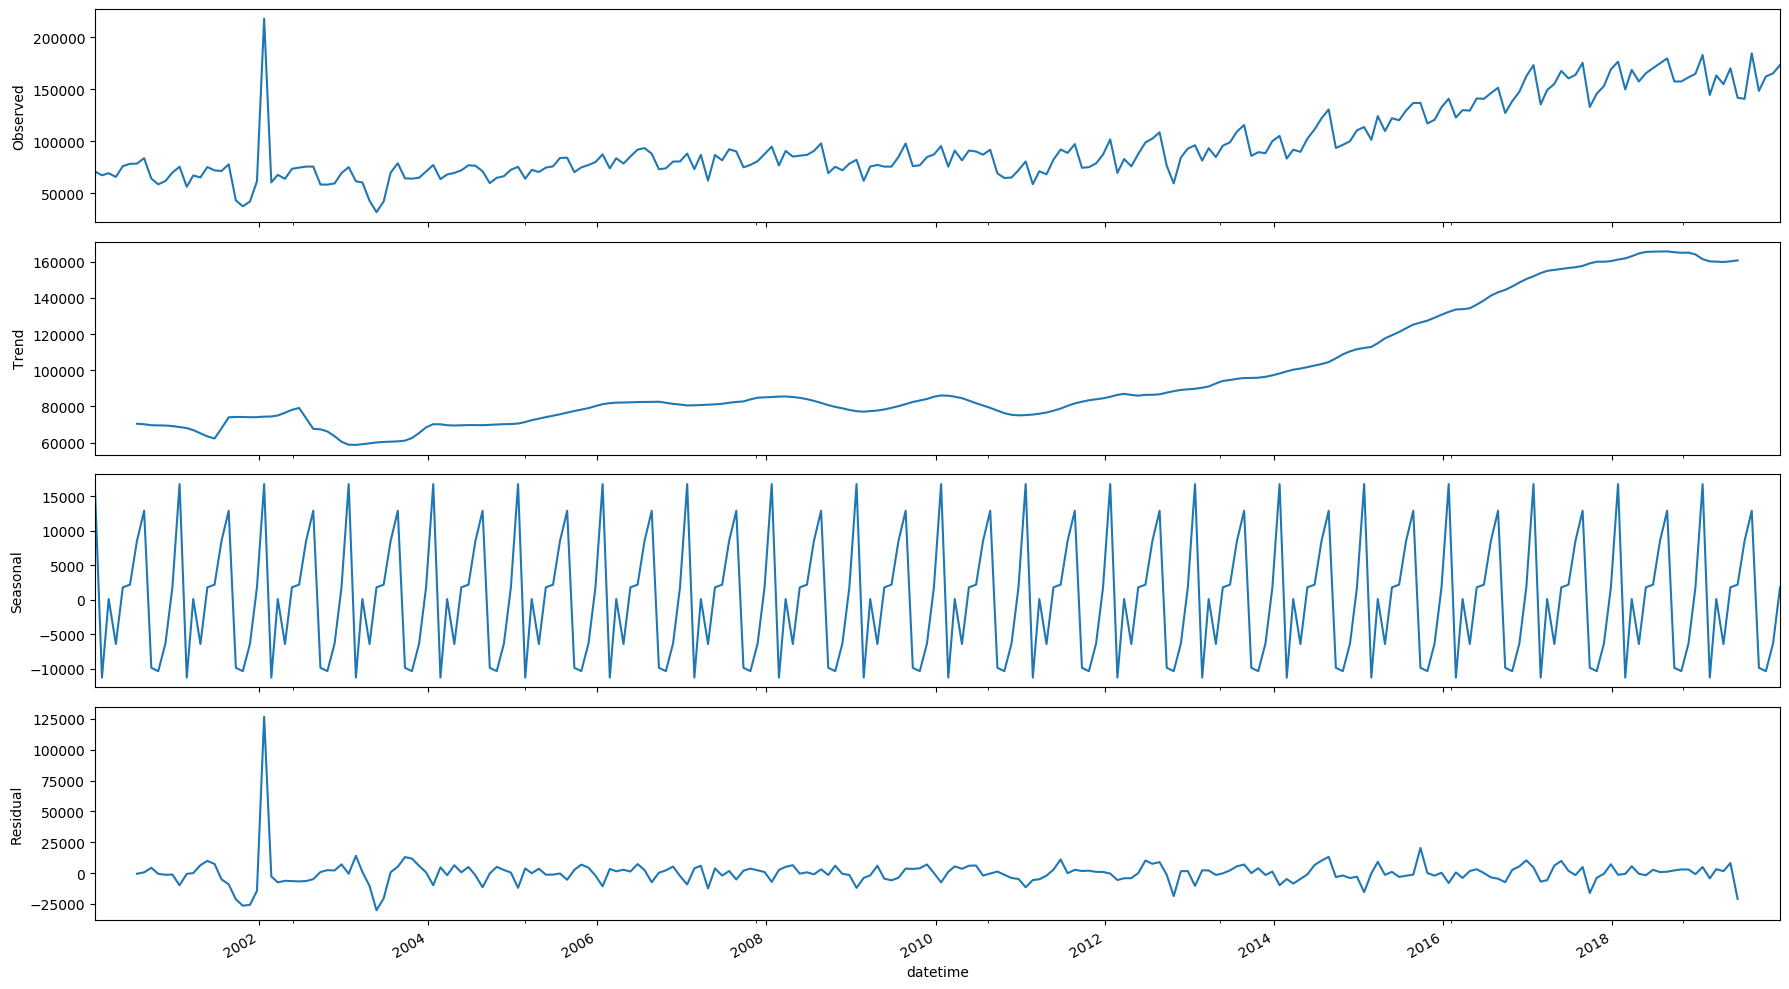

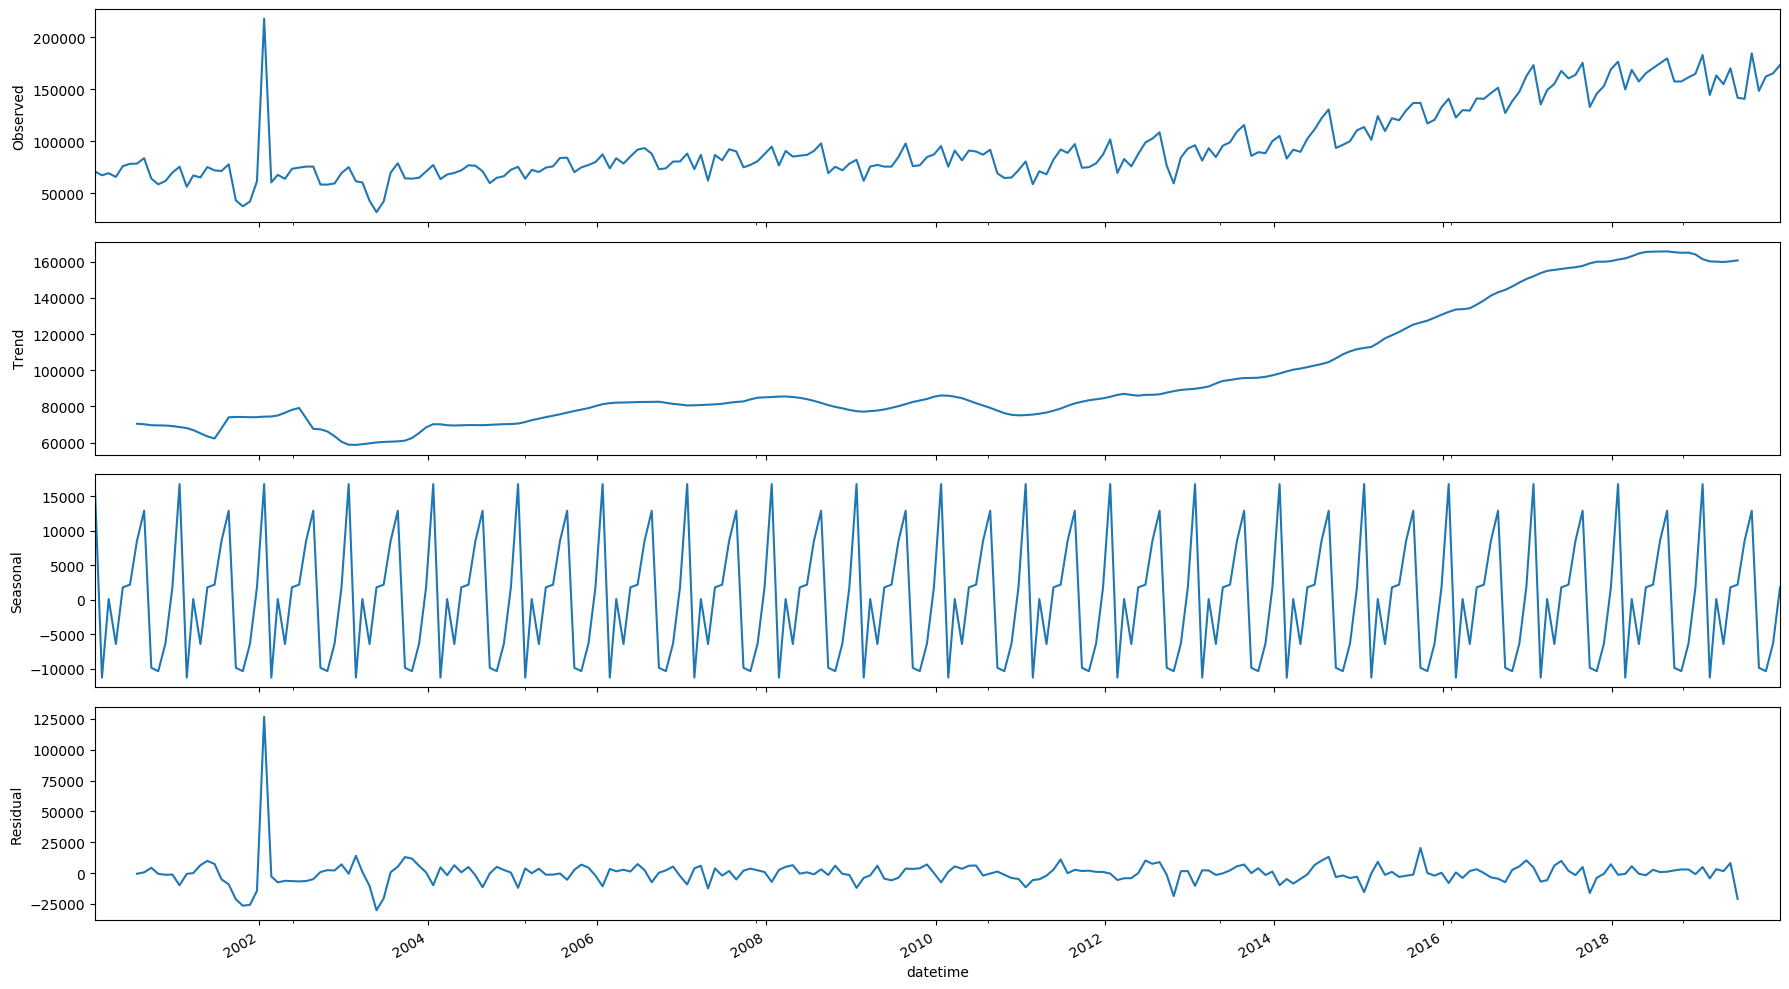

In [28]:
what = 'Passenger'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [29]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

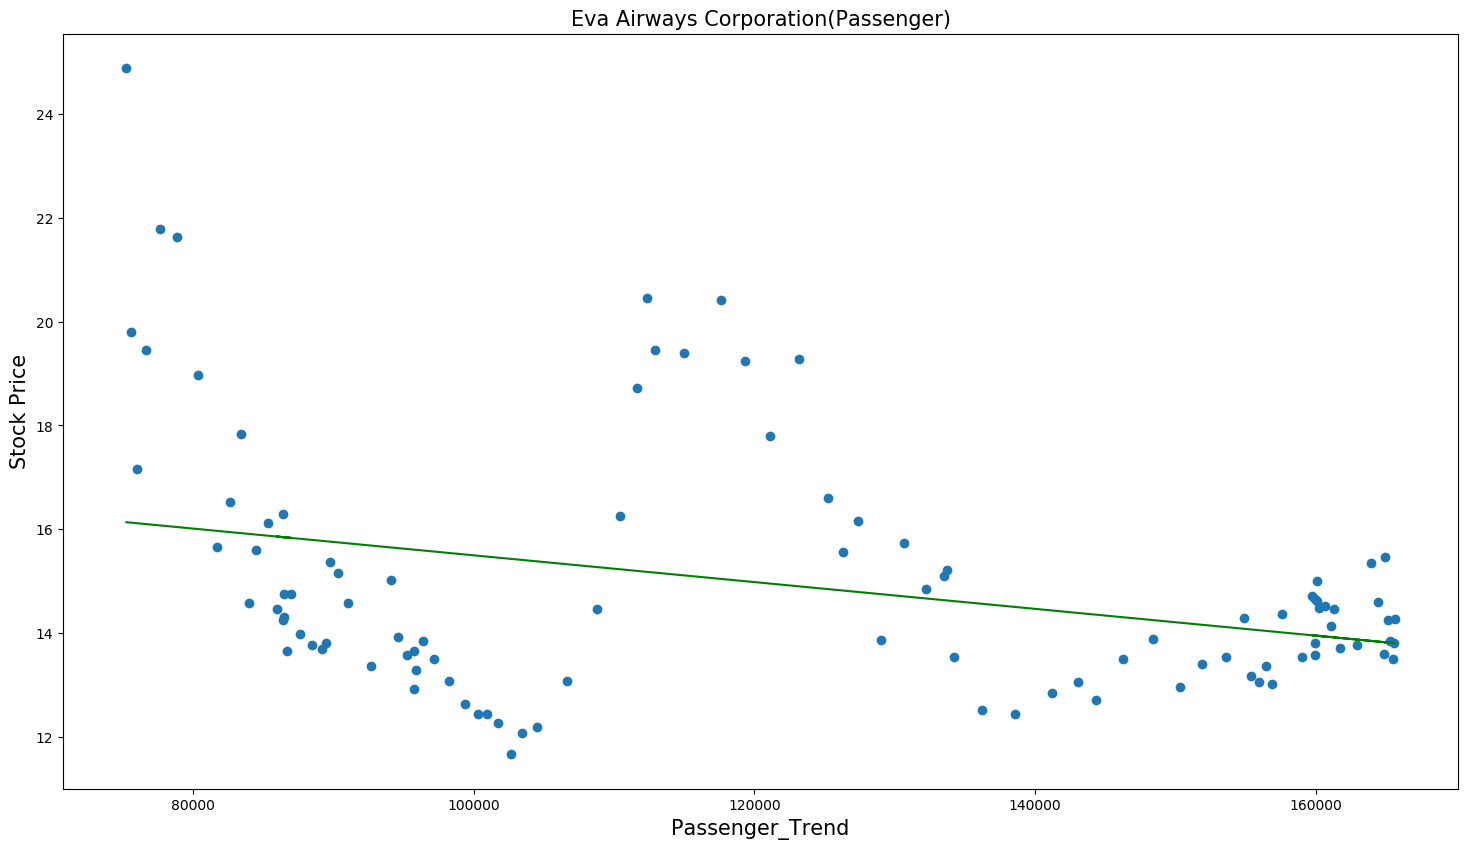

In [30]:
line = LinearRegression()
y_value = chart_info['Price'][0:195]
x_value = chart_info[what].values[0:195]
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Passenger)'.format(company), fontsize = 15)
plt.xlabel('{}_Trend'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [31]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     12.52
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           0.000612
Time:                        14:17:49   Log-Likelihood:                -228.57
No. Observations:                 102   AIC:                             461.1
Df Residuals:                     100   BIC:                             466.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0769      0.911     19.852      0.000      16.270      19.883
x1         -2.579e-05   7.29e-06     -3.539      0.001   -4.03e-05   -1.13e-05
==============================================================================
Omnibus:                       25.252   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.762
Skew:                           1.188   Prob(JB):                     1.72e-08
Kurtosis:                       4.665   Cond. No.                     5.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

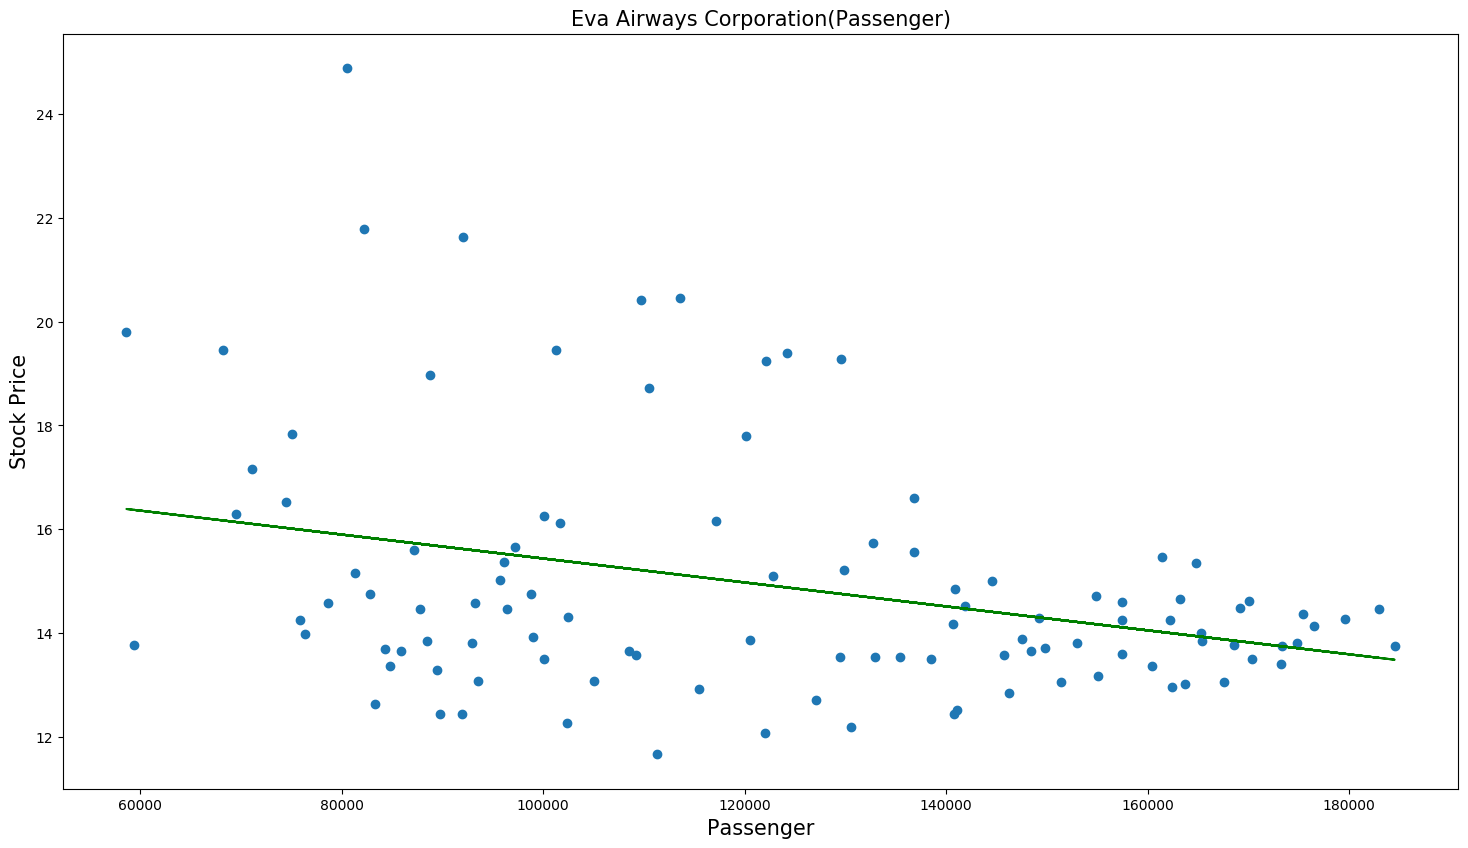

In [33]:
what = 'Passenger'
y_value = stockdata['Price'].values[0:189]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:189]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Passenger)'.format(company), fontsize = 15)
plt.xlabel('{}'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [34]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     13.09
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           0.000456
Time:                        14:17:51   Log-Likelihood:                -239.58
No. Observations:                 108   AIC:                             483.2
Df Residuals:                     106   BIC:                             488.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7439      0.815     21.766      0.000      16.128      19.360
x1         -2.308e-05   6.38e-06     -3.618      0.000   -3.57e-05   -1.04e-05
==============================================================================
Omnibus:                       32.341   Durbin-Watson:                   0.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.221
Skew:                           1.327   Prob(JB):                     1.68e-12
Kurtosis:                       5.237   Cond. No.                     4.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""